In [4]:
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder.appName('IPL Data Analysis').getOrCreate()

In [6]:
spark

In [29]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DateType

ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])
ball_by_ball_df = spark.read.csv('./Ball_By_Ball.csv',
                           header=True, schema=ball_by_ball_schema)

In [31]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),  # 'year' is not a PySpark type, use IntegerType
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])
match_df = spark.read.csv('./Match.csv',
                           header=True, schema=match_schema)

In [32]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])
player_df = spark.read.csv('./Player.csv',
                           header=True, schema=player_schema)

In [33]:
from pyspark.sql.types import DecimalType

player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(20, 5), True),  # Assuming precision=20, scale=5
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])
player_match_df = spark.read.csv('./Player_match.csv',
                           header=True, schema=player_match_schema)

In [34]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.csv('./Team.csv',
                           header=True, schema=team_schema)

In [37]:
from pyspark.sql.functions import col

ball_by_ball_df = ball_by_ball_df.filter((col("wides") == 0) & (col("noballs") == 0))

In [47]:
from pyspark.sql.functions import sum, avg , when

total_avg_runs = ball_by_ball_df.groupBy("match_id", "innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("avg_runs")
)


In [48]:
from pyspark.sql.window import Window

windowSpec = Window.partitionBy("match_id", "innings_no") \
                   .orderBy(col("runs_scored").desc())

In [49]:
ball_by_ball_df.show()

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [50]:
ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact" ,
    when((col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket") == True), True).otherwise(False)
)

In [51]:
ball_by_ball_df.show()

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|field

In [52]:
from pyspark.sql.functions import year, month, dayofmonth, when

match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

match_df.show(2)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      NULL|       2008|M Chinnaswamy Sta...| Bangalore|       I

In [54]:
from pyspark.sql.functions import current_date, expr

player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
)

player_match_df = player_match_df.withColumn(
    "years_since_debut",
    (year(current_date()) - col("season_year"))
)

player_match_df.show()

+---------------+-----------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|  playermatch_key|match_id|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+-----------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--

In [55]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [56]:
ball_by_ball_df.columns

['match_id',
 'over_id',
 'ball_id',
 'innings_no',
 'team_batting',
 'team_bowling',
 'striker_batting_position',
 'extra_type',
 'runs_scored',
 'extra_runs',
 'wides',
 'legbyes',
 'byes',
 'noballs',
 'penalty',
 'bowler_extras',
 'out_type',
 'caught',
 'bowled',
 'run_out',
 'lbw',
 'retired_hurt',
 'stumped',
 'caught_and_bowled',
 'hit_wicket',
 'obstructingfeild',
 'bowler_wicket',
 'match_date',
 'season',
 'striker',
 'non_striker',
 'bowler',
 'player_out',
 'fielders',
 'striker_match_sk',
 'strikersk',
 'nonstriker_match_sk',
 'nonstriker_sk',
 'fielder_match_sk',
 'fielder_sk',
 'bowler_match_sk',
 'bowler_sk',
 'playerout_match_sk',
 'battingteam_sk',
 'bowlingteam_sk',
 'keeper_catch',
 'player_out_sk',
 'matchdatesk',
 'high_impact']

In [57]:
top_scoring_batsmen_per_season = spark.sql("""
SELECT p.player_name, m.season_year, SUM(b.runs_scored) AS total_runs
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id
JOIN player_match pm ON b.striker = pm.player_id and m.match_id = pm.match_id
JOIN player p ON b.striker = p.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
""")

In [58]:
top_scoring_batsmen_per_season.show(30)

+---------------+-----------+----------+
|    player_name|season_year|total_runs|
+---------------+-----------+----------+
|       SE Marsh|       2008|       614|
|      G Gambhir|       2008|       532|
|  ST Jayasuriya|       2008|       508|
|      SR Watson|       2008|       463|
|       GC Smith|       2008|       437|
|   AC Gilchrist|       2008|       431|
|      YK Pathan|       2008|       430|
|       SK Raina|       2008|       420|
|       MS Dhoni|       2008|       414|
|       V Sehwag|       2008|       399|
|      RG Sharma|       2008|       399|
|       R Dravid|       2008|       370|
|     SC Ganguly|       2008|       349|
|       S Dhawan|       2008|       340|
|  KC Sangakkara|       2008|       319|
|      DJ Hussey|       2008|       318|
|     RV Uthappa|       2008|       316|
|    SA Asnodkar|       2008|       311|
|   Yuvraj Singh|       2008|       299|
|       PA Patel|       2008|       297|
|Y Venugopal Rao|       2008|       283|
|      JA Morkel

In [61]:
economical_bowlers_per_season = spark.sql("""
SELECT
p.player_name,
AVG(b.runs_scored) AS avg_runs_per_ball,
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >= 1
ORDER BY avg_runs_per_ball, total_wickets DESC
""")

economical_bowlers_per_season.show()

+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|     SM Harwood|0.3333333333333333|            0|
|      GR Napier|               0.5|            0|
|       AJ Finch|               0.5|            0|
|     Ankit Soni|               0.5|            0|
|     Avesh Khan|               0.5|            0|
|        A Zampa|               0.5|            0|
|       NB Singh|0.5833333333333334|            0|
|     AG Murtaza|0.6538461538461539|            0|
|      SB Bangar|0.6666666666666666|            0|
|     D du Preez|0.6666666666666666|            0|
|        S Gopal|0.6666666666666666|            0|
|     FH Edwards|0.6923076923076923|            0|
|       A Kumble|0.7685185185185185|            0|
|   KP Pietersen|0.7777777777777778|            0|
|       Umar Gul|0.7777777777777778|            0|
|J Syed Mohammad|0.7777777777777778|            0|
|  LA Carseldine|0.833333333333

In [62]:
toss_impact_individual_matches = spark.sql("""
SELECT m.match_id , m.toss_winner , m.toss_name , m.match_winner ,
    CASE WHEN m.toss_winner = m.match_winner THEN 'Won'
        ELSE 'Lost'
    END AS toss_result
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")

toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-----------+
|match_id|         toss_winner|toss_name|        match_winner|toss_result|
+--------+--------------------+---------+--------------------+-----------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|       Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|        Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|       Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|       Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|       Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|       Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|       Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|       Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|        Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|       Lost|
|  335997|    Rajasthan R

In [63]:
average_runs_in_wins = spark.sql("""
SELECT p.player_name, AVG(b.runs_scored) AS avg_runs_in_wins, COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins ASC
""")
average_runs_in_wins.show()

+--------------+-------------------+--------------+
|   player_name|   avg_runs_in_wins|innings_played|
+--------------+-------------------+--------------+
|     JJ Bumrah|                0.0|             2|
|      J Theron|                0.0|             1|
|      I Sharma|                0.0|             1|
|    KP Appanna|                0.0|             1|
|      TS Mills|                0.0|             3|
|     SN Thakur|                0.0|             2|
| Anirudh Singh|                0.0|             1|
|      VR Aaron|                0.0|             5|
|       A Nehra|                0.0|             2|
|    T Thushara|                0.2|             5|
|     SA Abbott|               0.25|             4|
| Yashpal Singh| 0.3157894736842105|            19|
|   S Sreesanth| 0.3333333333333333|             3|
|   KC Cariappa| 0.3333333333333333|             3|
|    JD Unadkat|                0.4|             5|
|    SM Harwood|0.42857142857142855|             7|
|       B Ku

In [64]:
import matplotlib.pyplot as plt

economical_bowlers_pd = economical_bowlers_per_season.toPandas()

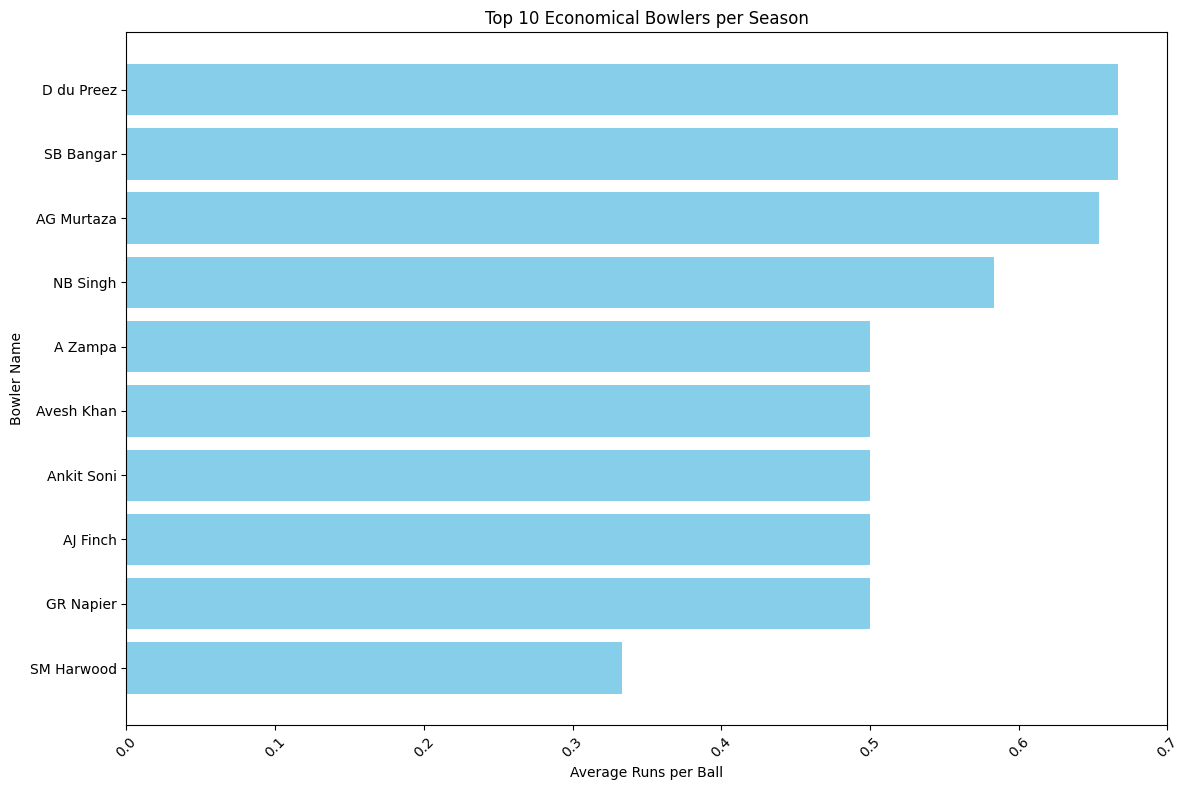

In [66]:
plt.figure(figsize=(12, 8))

top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')

plt.barh(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')

plt.ylabel('Bowler Name')
plt.xlabel('Average Runs per Ball')
plt.title('Top 10 Economical Bowlers per Season')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [73]:
import seaborn as sns

In [74]:
toss_impact_pd = toss_impact_individual_matches.toPandas()

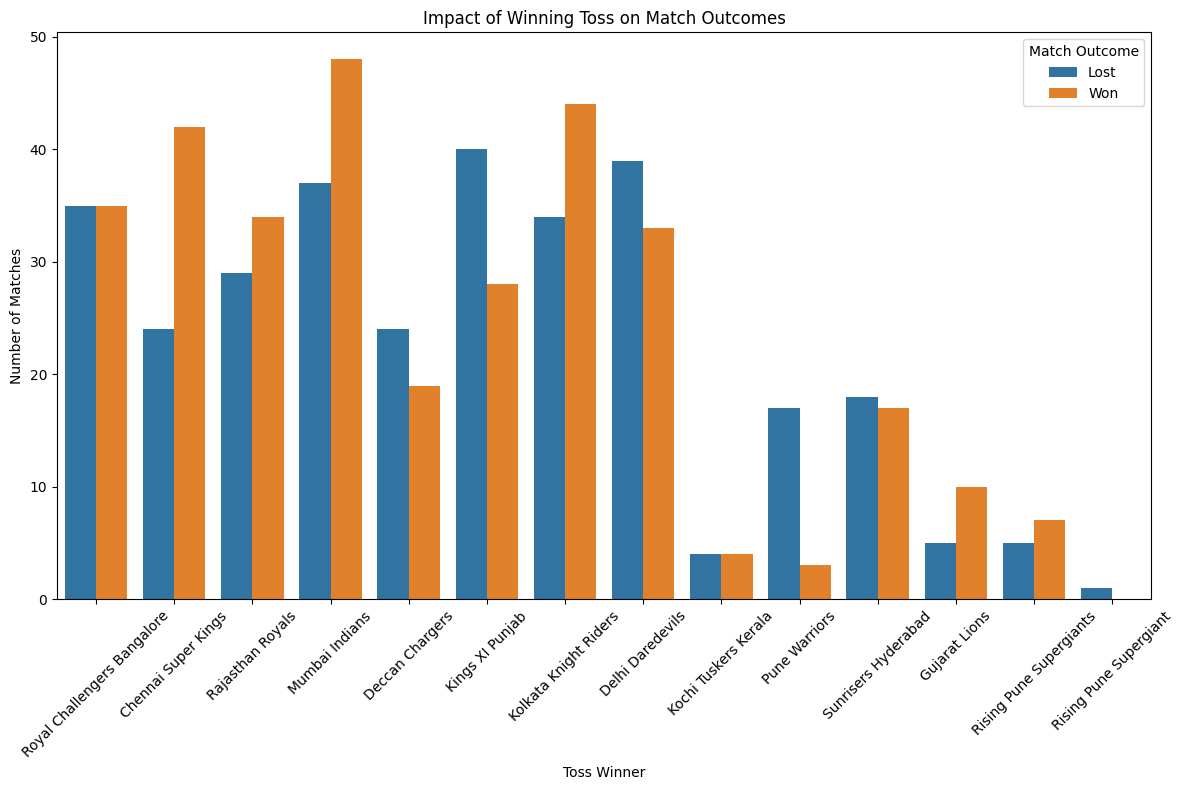

In [83]:
plt.figure(figsize=(12, 8))
sns.countplot(x='toss_winner', hue='toss_result', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [84]:
average_runs_pd = average_runs_in_wins.toPandas()

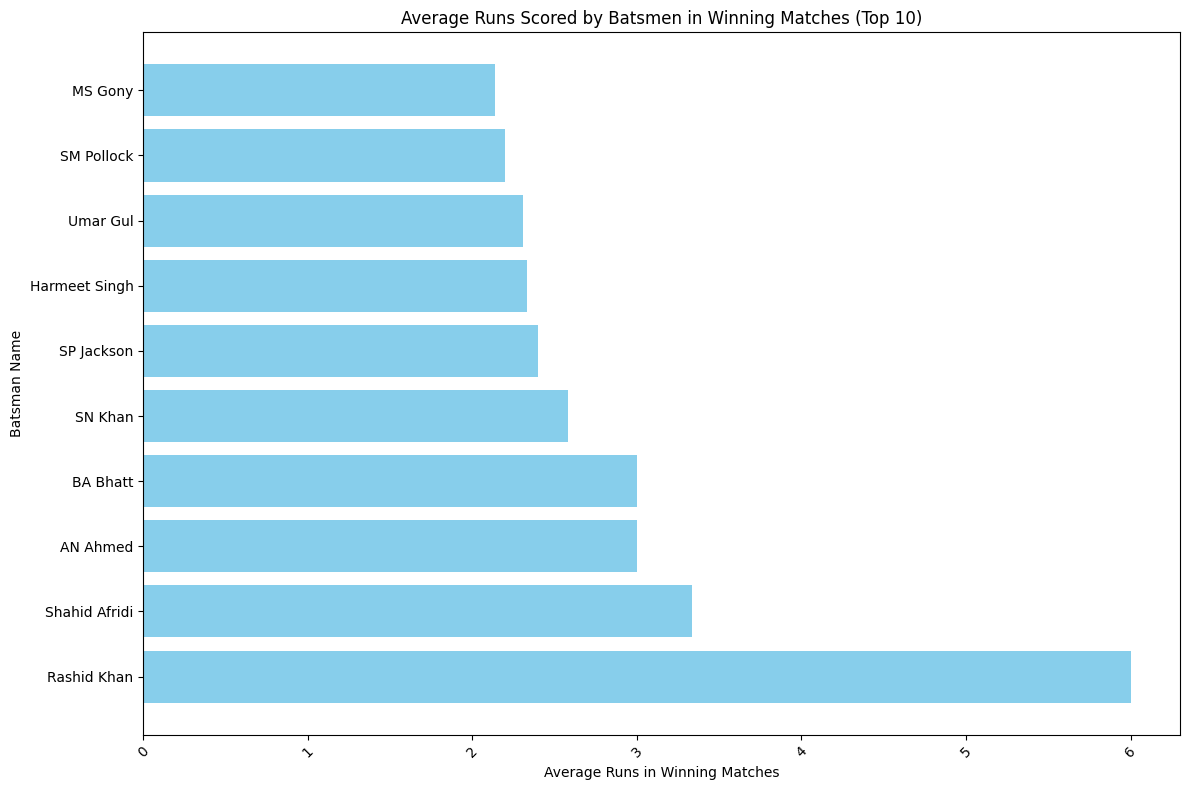

In [85]:
plt.figure(figsize=(12,8))
top_scores = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
plt.barh(top_scores['player_name'], top_scores['avg_runs_in_wins'], color='skyblue')
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10)')
plt.ylabel('Batsman Name')
plt.xlabel('Average Runs in Winning Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

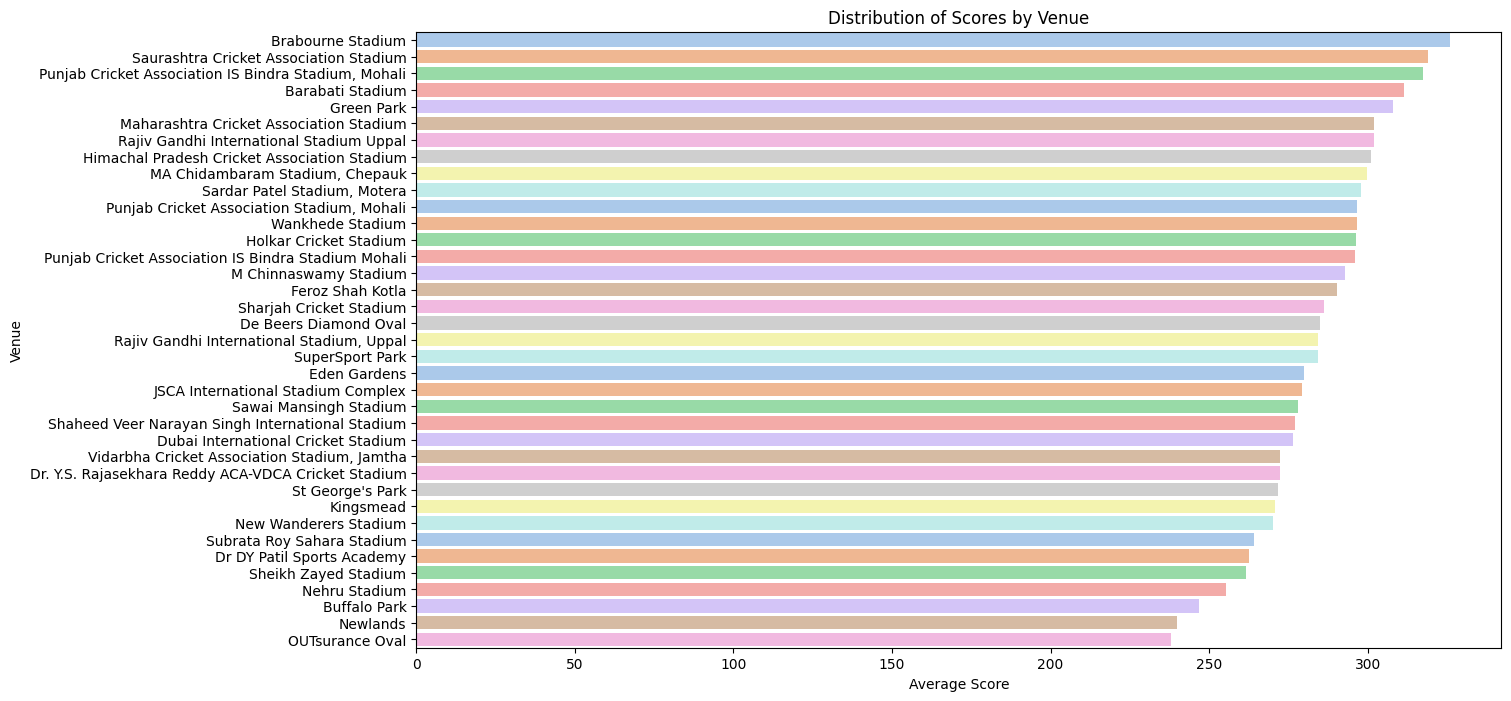

In [87]:
scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")
scores_by_venue_pd = scores_by_venue.toPandas()

plt.figure(figsize=(14, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd, palette='pastel')
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()


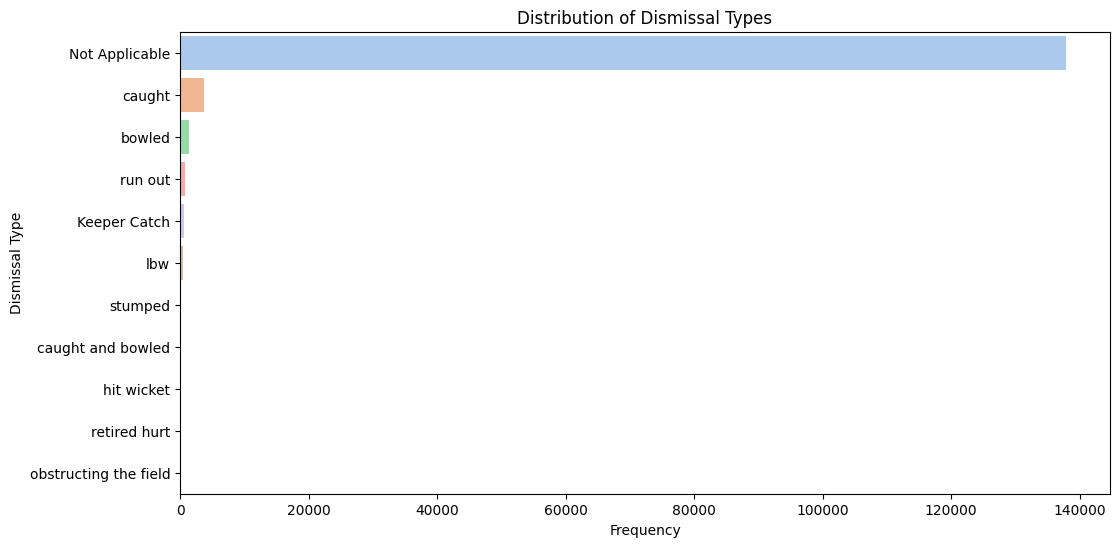

In [93]:
dismissal_types = spark.sql("""
SELECT out_type, COUNT(*) AS frequency
FROM ball_by_ball
WHERE out_type IS NOT NULL
GROUP BY out_type
ORDER BY frequency DESC
""")

dismissal_types_pd = dismissal_types.toPandas()
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd, palette='pastel')
plt.title('Distribution of Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()

In [94]:
team_toss_win_performance = spark.sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")

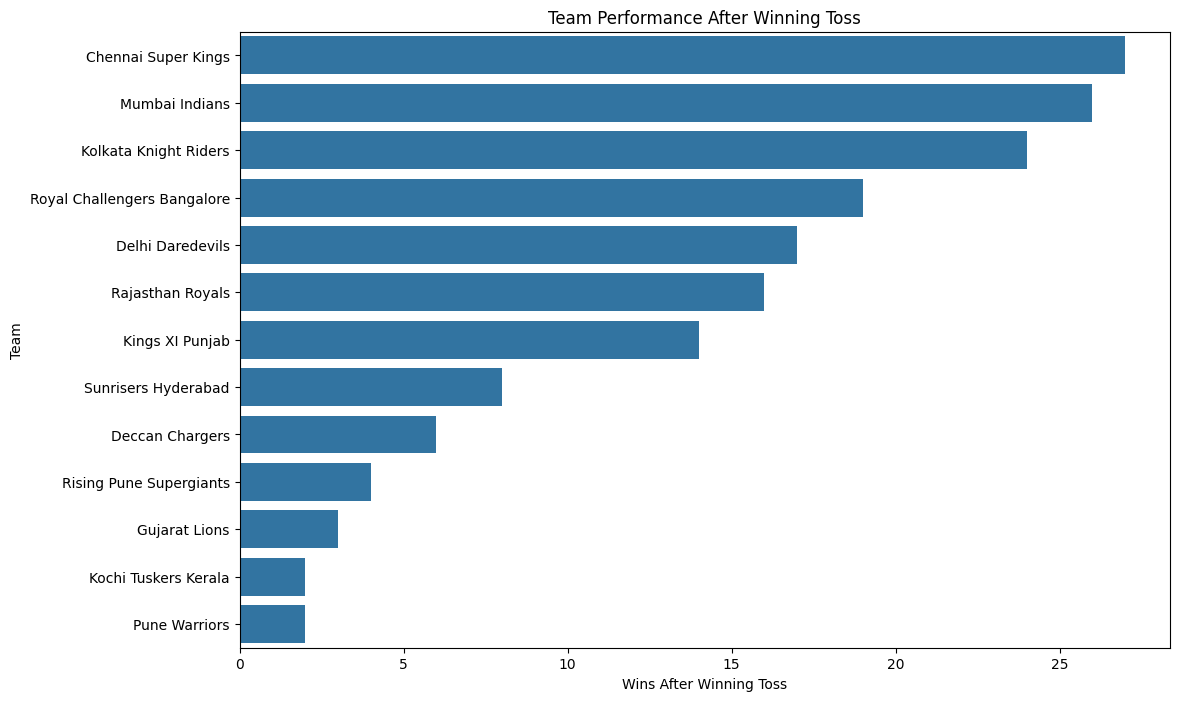

In [95]:
team_toss_win_pd = team_toss_win_performance.toPandas()

plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()